In [167]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from api_keys import quickstats_api


In [168]:
honey_data = []
honey_data = pd.DataFrame(honey_data)
honey_data["Year"] = ''
honey_data["State"] = ''

params = {
    'key': quickstats_api,
    'reference_period_desc' : 'MARKETING YEAR',
    'commodity_desc' : 'HONEY',
    'short_desc' : 'HONEY, BEE COLONIES - INVENTORY, MEASURED IN COLONIES',
}

base_url = 'https://quickstats.nass.usda.gov/api/api_GET/'


response = requests.get(base_url, params=params).json()
# print(response.url)

for x in (range(len(response['data']))):

    honey_data.loc[x,'Year'] = response['data'][x]['year']
    honey_data.loc[x,'State'] = response['data'][x]['location_desc']
    honey_data.loc[x,'Commodity'] = response['data'][x]['commodity_desc']
    honey_data.loc[x,'Data Type'] = response['data'][x]['short_desc']
    honey_data.loc[x,'Value'] = response['data'][x]['Value']


honey_data


,Year,State,Commodity,Data Type,Value
0,2018,US TOTAL,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...","2,803,000"
1,2017,US TOTAL,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...","2,684,000"
2,2016,US TOTAL,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...","2,780,000"
3,2015,US TOTAL,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...","2,661,000"
4,2014,US TOTAL,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...","2,741,000"
...,...,...,...,...,...
1423,1995,OTHER STATES,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...","8,000"
1424,1994,OTHER STATES,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...","6,000"
1425,1993,OTHER STATES,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...","9,000"
1426,1992,OTHER STATES,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...","9,000"


In [171]:
honey_data["Value"] = pd.to_numeric(honey_data["Value"].str.replace(',',''), errors='coerce')

In [172]:
def HoneyBeeState(x):
    x = input("What State would you like to plot?")
    x_upper = x.upper()
    honey_data_by_state = honey_data.loc[honey_data["State"] == f"{x_upper}"]

    x_axis = honey_data_by_state["Year"]
    y_axis = honey_data_by_state["Value"]

    plt.plot(x_axis, y_axis, color="Red", linewidth=1)
    plt.xticks(np.arange(1987, 2020, step=2), rotation=45)
    plt.xlabel("Year")
    plt.ylabel("Number of Honey Bee Colonies")
    plt.title(f"Number of Honey Bee Colonies over Time in {x}")

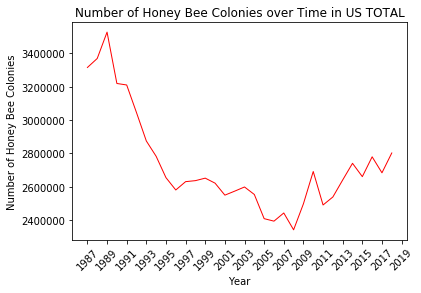

In [179]:
HoneyBeeState(x)